**<font size=6> Data_preparation_use_deghosting<font size=6>**

In [1]:
# env: UD_RM
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pylops


from subroutine.wavefieldsepforp import wavefield_sepforp
from subroutine.wavefieldsep import wavefield_separation

**<font size=5>wavefield sepration for q data<font size=5>**

In [2]:
# parameters
inputfile = '/home/wangn0e/2022-2023/first_research/dataset/originaldata_simple.npz'
inputdata = np.load(inputfile)
inputdata.files

# Receivers
r = inputdata['r']
dr = r[0, 1]-r[0, 0]
nr = r.shape[1]

# Sources
s = inputdata['s']
ds = s[0, 1]-s[0, 0]
ns = s.shape[1]

# models
rho = inputdata['rho']
vel = inputdata['vel']

# Time axis
t = inputdata['t']
ot, dt, nt = t[0], t[1]-t[0], len(t)
nt=nt+1
t  = np.arange(nt) * dt

# Axes
x, z = inputdata['x'], inputdata['z']
dx, dz = x[1] - x[0], z[1] - z[0]

# Wavelet
wav = inputdata['wav']
wav = wav / np.max(np.abs(np.fft.fft(wav))*dt) 
wav_c = np.argmax(wav)

# pressure and velocities
p_q   = inputdata['p_q']         # organized as (S, R, T)
vz_q  = inputdata['vz_q']        # organized as (S, R, T)(201, 201, 1081)
p_fz  = inputdata['p_fz']        # organized as (S, R, T)
vz_fz = inputdata['vz_fz']       # organized as (S, R, T)(201, 201, 1081)


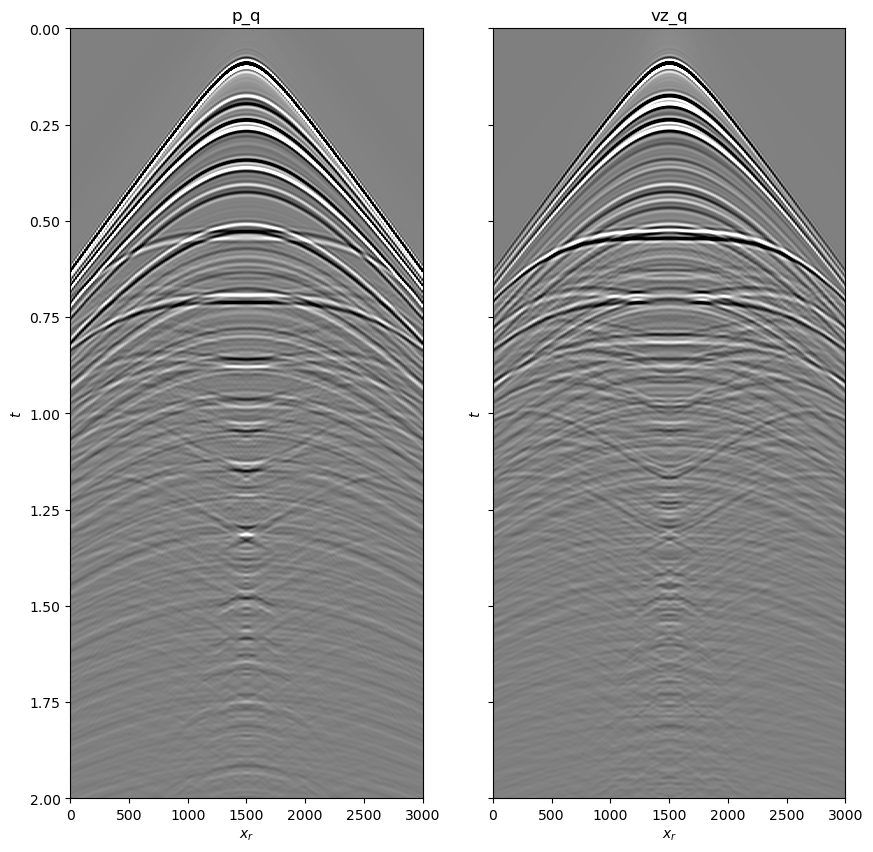

In [3]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
axs[0].imshow(p_q[ns//2].T, cmap='gray', vmin=-0.1*np.abs(p_q).max(), 
              vmax=0.1*np.abs(p_q).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('p_q'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(vz_q[ns//2].T, cmap='gray', vmin=-0.1*np.abs(vz_q).max(), 
              vmax=0.1*np.abs(vz_q).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('vz_q'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

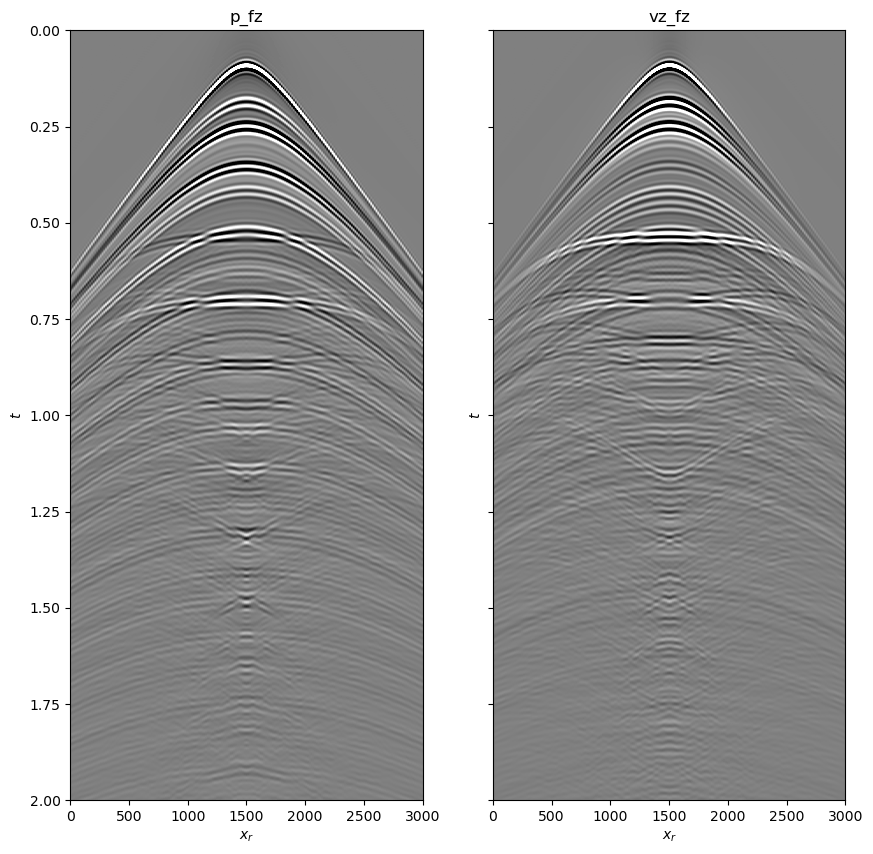

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
axs[0].imshow(p_fz[ns//2].T, cmap='gray', vmin=-0.1*np.abs(p_fz).max(), 
              vmax=0.1*np.abs(p_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('p_fz'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(vz_fz[ns//2].T, cmap='gray', vmin=-0.1*np.abs(vz_fz).max(), 
              vmax=0.1*np.abs(vz_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('vz_fz'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

**<font size=4>wavefield sepration for q_fz data at receiver side (ns,nr,nt)<font size=4>**

Working with source 0
Working with source 1
Working with source 2
Working with source 3
Working with source 4
Working with source 5
Working with source 6
Working with source 7
Working with source 8
Working with source 9
Working with source 10
Working with source 11
Working with source 12
Working with source 13
Working with source 14
Working with source 15
Working with source 16
Working with source 17
Working with source 18
Working with source 19
Working with source 20
Working with source 21
Working with source 22
Working with source 23
Working with source 24
Working with source 25
Working with source 26
Working with source 27
Working with source 28
Working with source 29
Working with source 30
Working with source 31
Working with source 32
Working with source 33
Working with source 34
Working with source 35
Working with source 36
Working with source 37
Working with source 38
Working with source 39
Working with source 40
Working with source 41
Working with source 42
Working with source 4

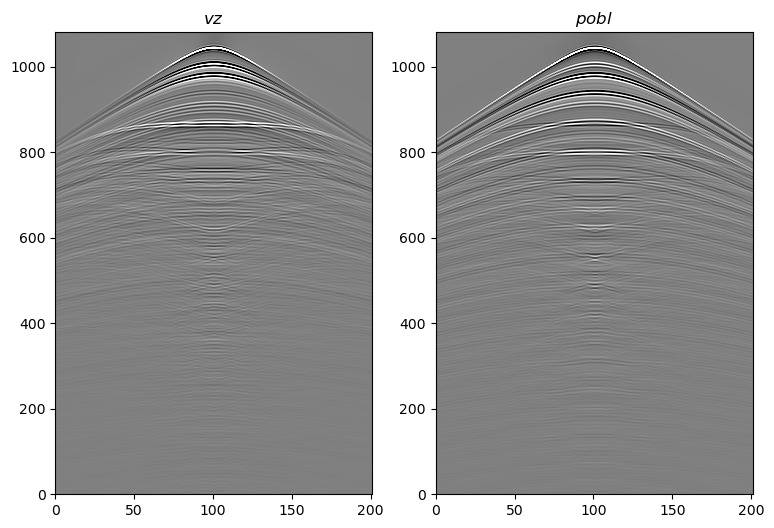

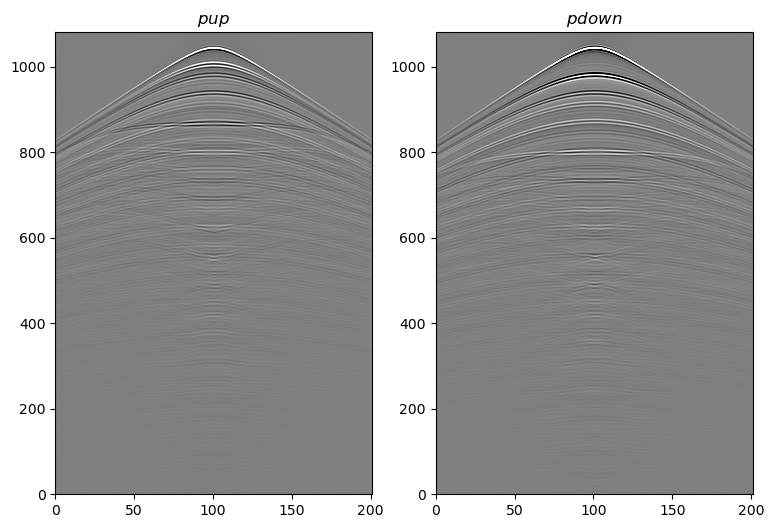

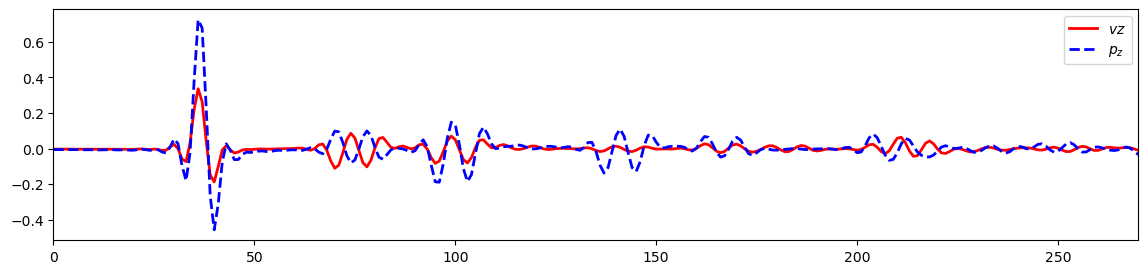

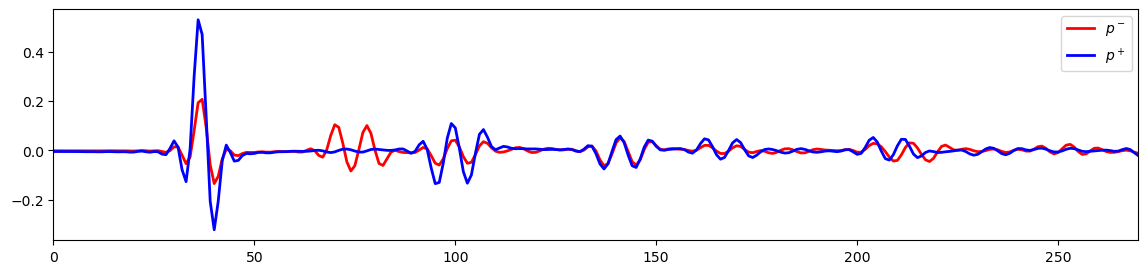

In [5]:
# wavefield seprate for p_fz
rho_sep = 1000      # density at sources
vel_sep = 2400.0    # velocity at sources
nffts = (2**11, 2**11)
pup_fz, pdown_fz =wavefield_sepforp(vz_fz, p_fz, dt, dr, rho_sep/1.6, vel_sep, nffts=nffts,
                                       critical=110, ntaper=10, verb=True, plotflag=True)

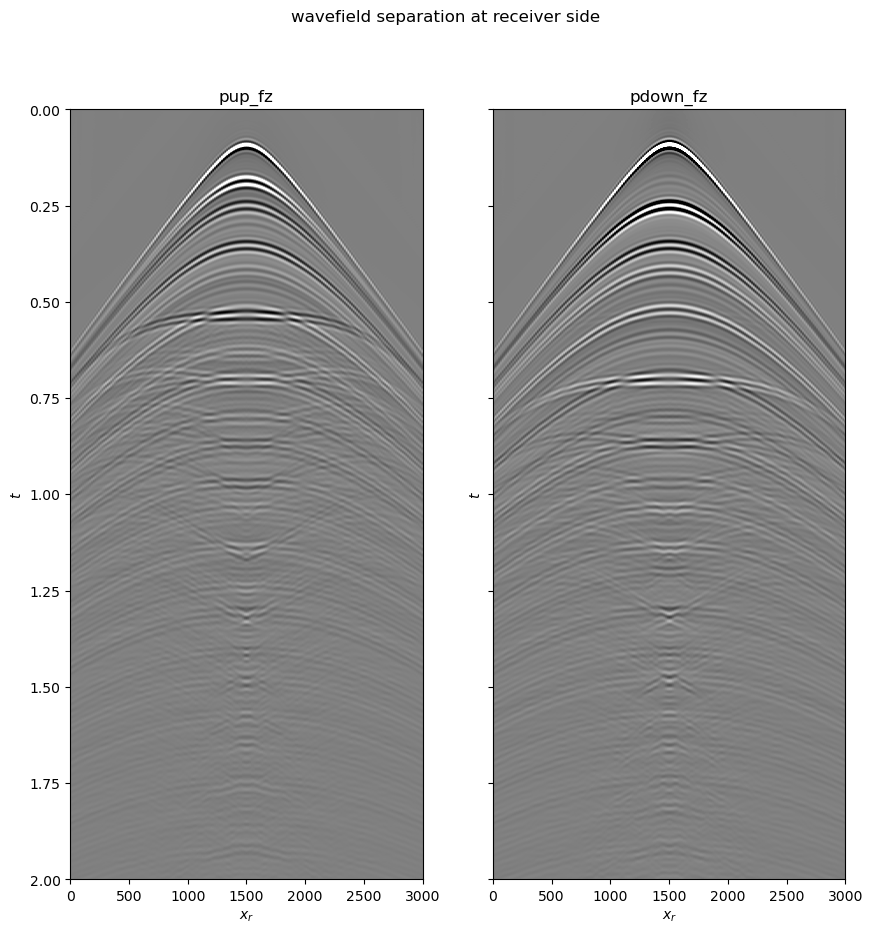

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('wavefield separation at receiver side')
axs[0].imshow(pup_fz[ns//2].T, cmap='gray', vmin=-0.1*np.abs(p_fz).max(), 
              vmax=0.1*np.abs(p_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('pup_fz'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(pdown_fz[ns//2].T, cmap='gray', vmin=-0.1*np.abs(p_fz).max(), 
              vmax=0.1*np.abs(p_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('pdown_fz'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

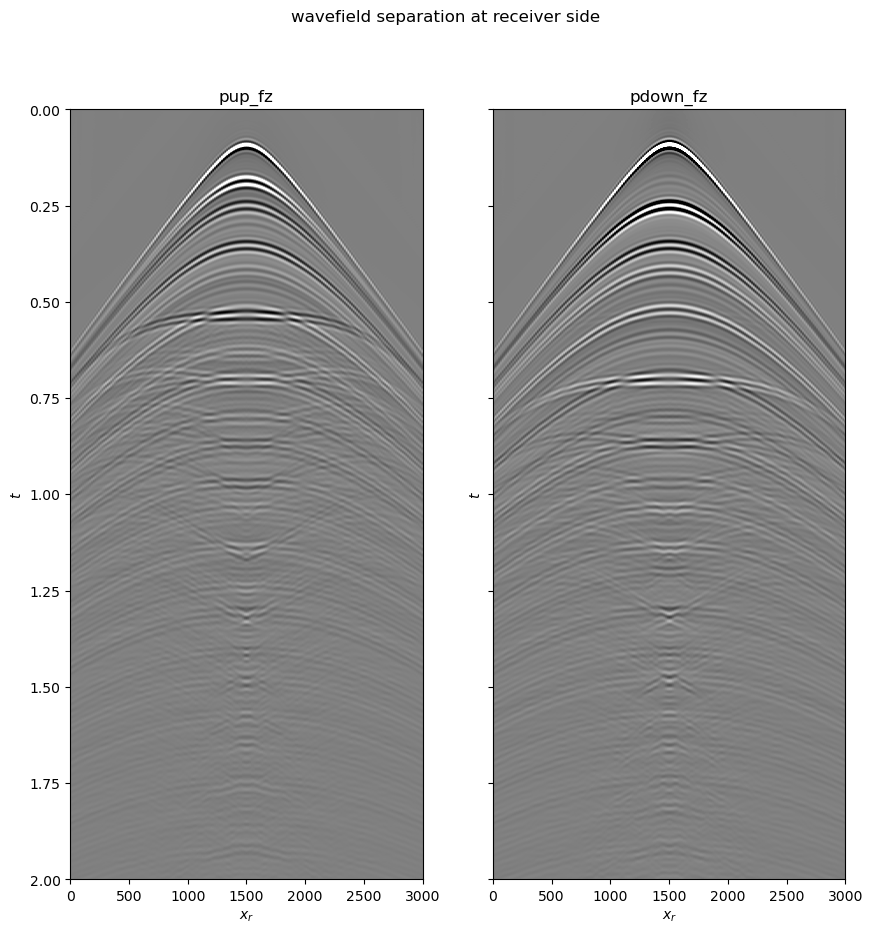

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('wavefield separation at receiver side')
axs[0].imshow(pup_fz[ns//2].T, cmap='gray', vmin=-0.1*np.abs(p_fz).max(), 
              vmax=0.1*np.abs(p_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('pup_fz'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(pdown_fz[ns//2].T, cmap='gray', vmin=-0.1*np.abs(p_fz).max(), 
              vmax=0.1*np.abs(p_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('pdown_fz'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

**<font size=4>wavefield sepration using deghosting for pdown_fz data at source side (nr,ns,nt)<font size=4>**

In [7]:
# change common shot gather into common receiver gather
pdown_fz   = pdown_fz.transpose(1, 0, 2)          # organized as  (S, R, T),need to be (R, S, T) 
pdown_up   = np.zeros([nr,ns,nt])
pdown_down = np.zeros([nr,ns,nt])

vel_sep = 2400
off = 0.037
clip = 2e-1  # plotting clip


In [21]:
for num_r in range(nr):
    if (num_r%10) == 0:
        print('running for receiver',num_r)
    
    p = pdown_fz[num_r]
    
    # Window
    
    direct = np.sqrt((r[0,num_r]-s[0])**2+(r[1,num_r]-s[1])**2)/vel_sep
    direct_off = direct + off
    win = np.zeros((nt, ns))
    iwin = np.round(direct_off / dt).astype(int)
    for i in range(ns):
        win[iwin[i] :, i] = 1

    pup, pdown = pylops.waveeqprocessing.Deghosting(
        p.T,
        nt,
        ns,
        dt,
        ds,
        vel_sep,
        s[1, 0]+ 0.8*dz, # 0.8 is better than 1
        win=win,
        npad=5,
        ntaper=11,
        solver=lsqr,
        dottest=False,
        dtype="complex128",
        **dict(damp=1e-1, iter_lim=30)
    )
    pdown_up[num_r] = pup.T
    pdown_down[num_r] = pdown.T
    

running for receiver 0
running for receiver 10
running for receiver 20
running for receiver 30
running for receiver 40
running for receiver 50
running for receiver 60
running for receiver 70
running for receiver 80
running for receiver 90
running for receiver 100
running for receiver 110
running for receiver 120
running for receiver 130
running for receiver 140
running for receiver 150
running for receiver 160
running for receiver 170
running for receiver 180
running for receiver 190
running for receiver 200


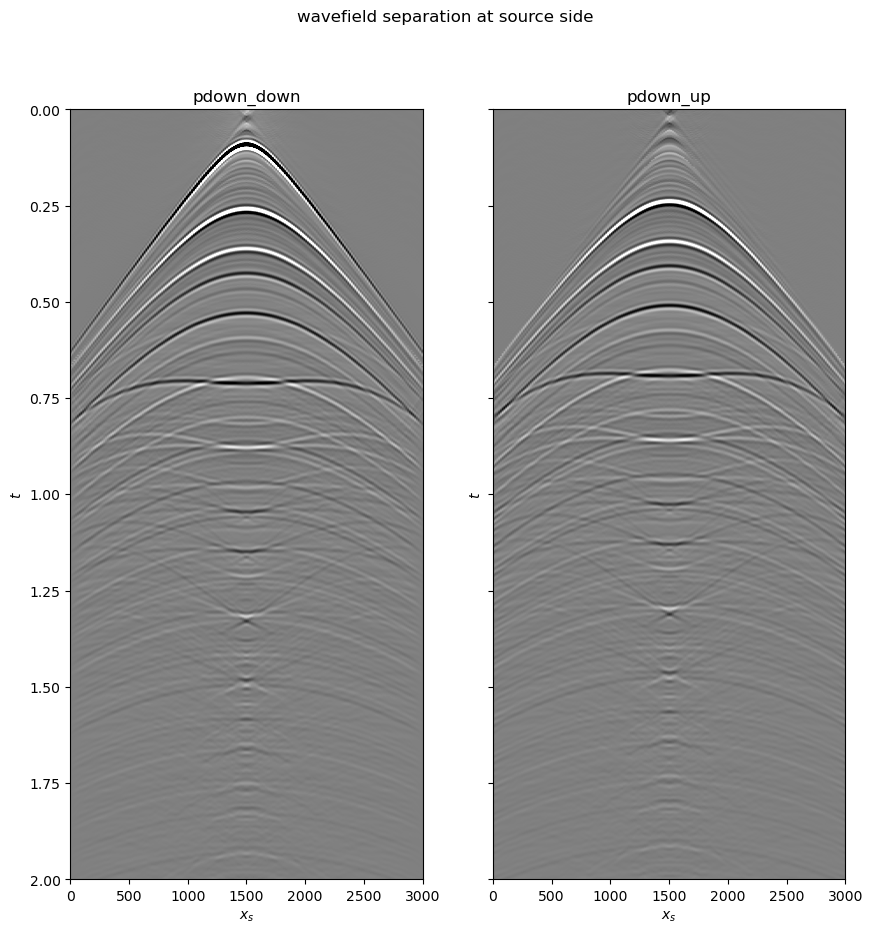

In [10]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('wavefield separation at source side')
axs[0].imshow(pdown_down[nr//2].T, cmap='gray', vmin=-0.1*np.abs(pdown_fz).max(), 
              vmax=0.1*np.abs(pdown_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('pdown_down'), axs[0].set_xlabel(r'$x_s$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(pdown_up[nr//2].T, cmap='gray', vmin=-0.1*np.abs(pdown_fz).max(), 
              vmax=0.1*np.abs(pdown_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('pdown_up'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

In [10]:
# window to remove the direct wave 
toff = 0.04          # direct arrival time shift 0.05
nsmooth = 10         # time window smoothing 10

# Direct arrival traveltimes
directSr = np.zeros((nr, ns),dtype = float)
for i in range(0, ns):
    directSr[i,:] = np.sqrt((r[0,i]-s[0])**2+(r[1,i]-s[1])**2)/vel_sep

directSr_rd = directSr + toff

idirectSr_rd = np.round(directSr_rd/dt).astype(np.int)
wrs_rd = np.ones((nr, ns, nt))

for inr in range(nr):
    for ins in range(ns):
        wrs_rd[inr, ins, :idirectSr_rd[inr, ins]]=0

In [11]:
# remove direct arrival
pdown_up_win = wrs_rd*pdown_up

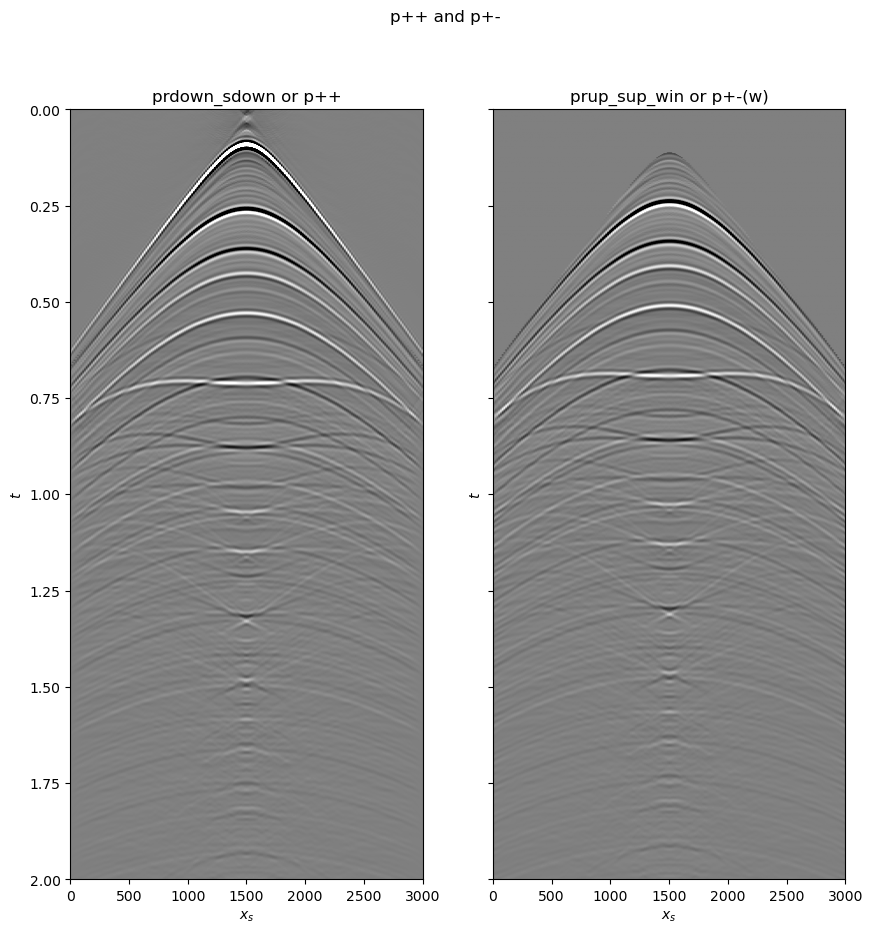

In [12]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('p++ and p+-')
axs[0].imshow(pdown_down[nr//2].T, cmap='gray', vmin=-0.1*np.abs(pdown_down+pdown_up).max(), 
              vmax=0.1*np.abs(pdown_down+pdown_up).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('prdown_sdown or p++'), axs[0].set_xlabel(r'$x_s$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(pdown_up_win[nr//2].T, cmap='gray', vmin=-0.1*np.abs(pdown_down+pdown_up).max(), 
              vmax=0.1*np.abs(pdown_down+pdown_up).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('prup_sup_win or p+-(w)'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

In [14]:
np.savez_compressed('..dataset/inputdata_syncline',Pd=pdown_down,Puw=pdown_up_win,r=r,s=s,rho=rho,vel=vel,t=t,x=x,z=z,wav=wav)